In [68]:
# Import packages
import os
import sys
import datetime
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [69]:
# Set date timestamps for historical data download
start_date = datetime.datetime(2018, 1, 1).date()
end_date = datetime.datetime.now().date()
start_date, end_date

(datetime.date(2018, 1, 1), datetime.date(2020, 11, 17))

In [70]:
end_date - start_date

datetime.timedelta(days=1051)

In [71]:
ticker = "SAP"
# ticker = "GOOGL"
# ticker = "MSFT"
# ticker = "FB"

In [72]:
msft = yf.Ticker(ticker)

msft

yfinance.Ticker object <SAP>

In [73]:
msft.info

{'zip': '69190',
 'sector': 'Technology',
 'fullTimeEmployees': 101450,
 'longBusinessSummary': 'SAP SE operates as an enterprise application software, and analytics and business intelligence company worldwide. The company operates through three segments: Applications, Technology & Services; SAP Business Network; and Customer Experience. It offers SAP HANA, which enables businesses to process and analyze live data; SAP Data Hub, a solution for businesses to manage data from various sources; and SAP Cloud platform that offers an enterprise platform-as-a-service. The company also provides SAP Leonardo, a system that combines design thinking services with intelligent technologies for business processes; SAP Analytics Cloud, which leverages the intersection of business intelligence, planning, and predictive analytics; SAP BW/4HANA, a data warehouse solution; SAP S/4HANA, an enterprise resource planning suite for intelligent enterprises; SAP Integrated Business Planning solutions that deliv

In [74]:
historical_data = msft.history(start=start_date, end=end_date, interval="1d").reset_index()

historical_data.shape

(725, 8)

In [75]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,106.54,107.68,106.45,107.65,540600,0.0,0
1,2018-01-03,107.88,108.90,107.81,108.53,506200,0.0,0
2,2018-01-04,109.94,110.44,109.87,110.20,539300,0.0,0
3,2018-01-05,110.58,111.59,110.50,111.43,475300,0.0,0
4,2018-01-08,110.24,110.56,109.92,109.96,515400,0.0,0


The above data shows stock prices on per day basis.

+ High: Max stock price on that particular day
+ Low: Lowest price went on that particular day
+ Open: Stock price opening on that particular day
+ Close: Final closing price of the stock on that particular day
+ Volume: Amount of stock traded on that day
+ Dividends: Dividens given (if any)
+ Stock Splits: Stock split happend on that particular day (if any)

In [76]:
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,725.000000,725.000000,725.000000,725.000000,7.250000e+02,725.000000,725.0
mean,120.264510,121.104041,119.331572,120.247145,8.832869e+05,0.007083,0.0
std,17.523091,17.579566,17.401185,17.499956,7.501282e+05,0.109957,0.0
min,91.180000,94.170000,89.610000,92.390000,1.179000e+05,0.000000,0.0
25%,107.260000,107.990000,106.060000,106.960000,4.928000e+05,0.000000,0.0
50%,116.440000,117.250000,115.650000,116.190000,7.056000e+05,0.000000,0.0
75%,131.670000,132.420000,131.080000,131.700000,9.965000e+05,0.000000,0.0
max,168.090000,169.300000,166.290000,169.020000,1.129020e+07,1.727000,0.0


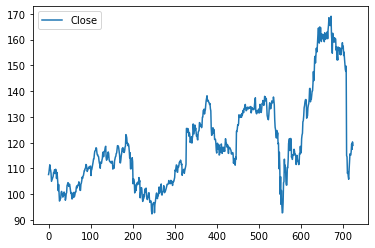

In [77]:
fig = plt.figure()

plt.plot(historical_data.Close)

plt.legend(["Close", "Open"])

# Feature Engineering

In [78]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,106.54,107.68,106.45,107.65,540600,0.0,0
1,2018-01-03,107.88,108.90,107.81,108.53,506200,0.0,0
2,2018-01-04,109.94,110.44,109.87,110.20,539300,0.0,0
3,2018-01-05,110.58,111.59,110.50,111.43,475300,0.0,0
4,2018-01-08,110.24,110.56,109.92,109.96,515400,0.0,0


In [79]:
# Create lag features
for i in range(1, 7):
    historical_data[f"Close_lag_{i}"] = historical_data.Close.shift(periods=i, axis=0)
    historical_data[f"Open_lag_{i}"] = historical_data.Open.shift(periods=i, axis=0)
    historical_data[f"High_lag_{i}"] = historical_data.High.shift(periods=i, axis=0)
    historical_data[f"Low_lag_{i}"] = historical_data.Low.shift(periods=i, axis=0)

historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2018-01-02,106.54,107.68,106.45,107.65,540600,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,107.88,108.90,107.81,108.53,506200,0.0,0,107.65,106.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-04,109.94,110.44,109.87,110.20,539300,0.0,0,108.53,107.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-05,110.58,111.59,110.50,111.43,475300,0.0,0,110.20,109.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-08,110.24,110.56,109.92,109.96,515400,0.0,0,111.43,110.58,...,107.68,106.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
historical_data.fillna(0, inplace=True)
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2018-01-02,106.54,107.68,106.45,107.65,540600,0.0,0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,107.88,108.90,107.81,108.53,506200,0.0,0,107.65,106.54,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-04,109.94,110.44,109.87,110.20,539300,0.0,0,108.53,107.88,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,110.58,111.59,110.50,111.43,475300,0.0,0,110.20,109.94,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-08,110.24,110.56,109.92,109.96,515400,0.0,0,111.43,110.58,...,107.68,106.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
historical_data.drop(
    columns=["Dividends", "Stock Splits", "Volume", "Open", "High", "Low"], inplace=True)

In [53]:
# # Create a holiday dataframe
# min_date, max_date = historical_data.Date.min(), historical_data.Date.max()
# print("Min/Max dates:", min_date, max_date)

# date_range = pd.date_range(start=min_date, end=max_date)
# print("Date range:", date_range.min(), date_range.max())

# # Find dates not present in historical df - closed stock market holiday
# holiday_date_range = [d.date() for d in date_range if d not in historical_data.Date]
# holiday_date_range[:5]

In [54]:
# holidays = pd.DataFrame({
#     "holiday": "shutdown",
#     "ds": pd.to_datetime(holiday_date_range),
#     "lower_bound": 0,
#     "upper_bound": 1,
# })

# holidays.head()

# Modelling

## Facebook's Prophet: Single Timestep Forecasting

References: 
+ https://facebook.github.io/prophet/

In [82]:
import fbprophet as prophet

In [83]:
validation_period = 30 # 30 days

train, validation = historical_data.iloc[:-validation_period], historical_data.iloc[-validation_period:]

train.shape, validation.shape

((695, 26), (30, 26))

In [84]:
train.head()

,Date,Close,Close_lag_1,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_2,Open_lag_2,High_lag_2,Low_lag_2,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2018-01-02,107.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,108.53,107.65,106.54,107.68,106.45,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-04,110.20,108.53,107.88,108.90,107.81,107.65,106.54,107.68,106.45,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,111.43,110.20,109.94,110.44,109.87,108.53,107.88,108.90,107.81,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-08,109.96,111.43,110.58,111.59,110.50,110.20,109.94,110.44,109.87,...,107.68,106.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train and Forecast

In [85]:
lag_features = [col for col in historical_data.columns if "lag" in col]

In [86]:
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode="additive")
for name in lag_features:
    model.add_regressor(name)

model.fit(df=train.rename(columns={"Date": "ds", "Close":"y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [87]:
forecast = model.predict(validation[[col for col in validation.columns if col != "Close"]].rename(columns={"Date": "ds"}))

forecast.shape

(30, 94)

In [88]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_lag_1,Close_lag_1_lower,Close_lag_1_upper,Close_lag_2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-06,132.239348,156.377816,165.677969,132.239348,132.239348,12.302236,12.302236,12.302236,13.572367,...,2.203464,2.203464,2.203464,1.583835,1.583835,1.583835,0.0,0.0,0.0,160.895000
1,2020-10-07,132.289458,154.525072,163.527223,132.289458,132.289458,11.456737,11.456737,11.456737,14.467755,...,2.081288,2.081288,2.081288,1.778546,1.778546,1.778546,0.0,0.0,0.0,159.223510
2,2020-10-08,132.339567,153.893308,162.652361,132.339567,132.339567,11.546261,11.546261,11.546261,13.479340,...,1.510486,1.510486,1.510486,1.983534,1.983534,1.983534,0.0,0.0,0.0,158.280062
3,2020-10-09,132.389676,156.146845,165.360501,132.389676,132.389676,12.143083,12.143083,12.143083,13.583996,...,1.879826,1.879826,1.879826,2.194746,2.194746,2.194746,0.0,0.0,0.0,160.655693
4,2020-10-12,132.540005,158.223513,167.414159,132.540005,132.540005,12.481283,12.481283,12.481283,14.281700,...,1.847594,1.847594,1.847594,2.824144,2.824144,2.824144,0.0,0.0,0.0,162.981557
5,2020-10-13,132.590114,159.847848,169.098299,132.589565,132.590200,13.021739,13.021739,13.021739,14.677066,...,2.203464,2.203464,2.203464,3.018971,3.018971,3.018971,0.0,0.0,0.0,164.401713
6,2020-10-14,132.640223,158.835590,167.524270,132.637060,132.642985,12.302236,12.302236,12.302236,15.308877,...,2.081288,2.081288,2.081288,3.200008,3.200008,3.200008,0.0,0.0,0.0,163.247312
7,2020-10-15,132.690333,158.568922,167.577842,132.684032,132.697149,12.580753,12.580753,12.580753,14.467755,...,1.510486,1.510486,1.510486,3.363938,3.363938,3.363938,0.0,0.0,0.0,162.744946
8,2020-10-16,132.740442,156.776559,166.284774,132.729633,132.750538,11.373845,11.373845,11.373845,14.793351,...,1.879826,1.879826,1.879826,3.507857,3.507857,3.507857,0.0,0.0,0.0,161.669285
9,2020-10-19,132.890770,158.569635,167.816757,132.857771,132.916055,11.811515,11.811515,11.811515,13.382437,...,1.847594,1.847594,1.847594,3.797935,3.797935,3.797935,0.0,0.0,0.0,163.075269


### Visualize forecasts

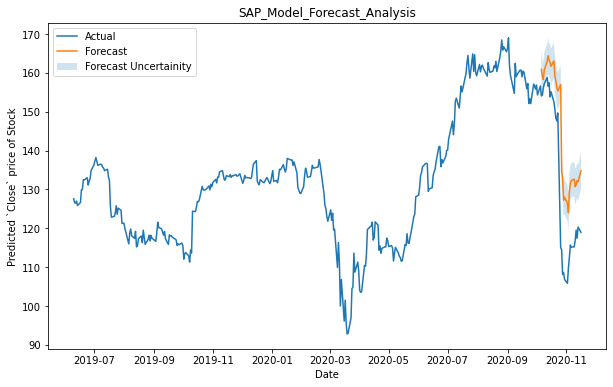

In [89]:
# Plotting predictions and uncertainity interval with respect to actuals
fig = plt.figure(figsize=(10, 6))

# Plot actuals
plt.plot(historical_data.Date.iloc[-365:], historical_data.Close.iloc[-365:])

# Plot forecasts for the latest 365 days as validation period
plt.plot(forecast.ds, forecast.yhat)

# Plot uncertainity - lower and upper bound for the forecasts
plt.fill_between(forecast.ds, forecast.yhat_lower, forecast.yhat_upper, alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Predicted `Close` price of Stock")
plt.legend(["Actual", "Forecast", "Forecast Uncertainity"])
plt.title(f"{ticker}_Model_Forecast_Analysis")
plt.show()

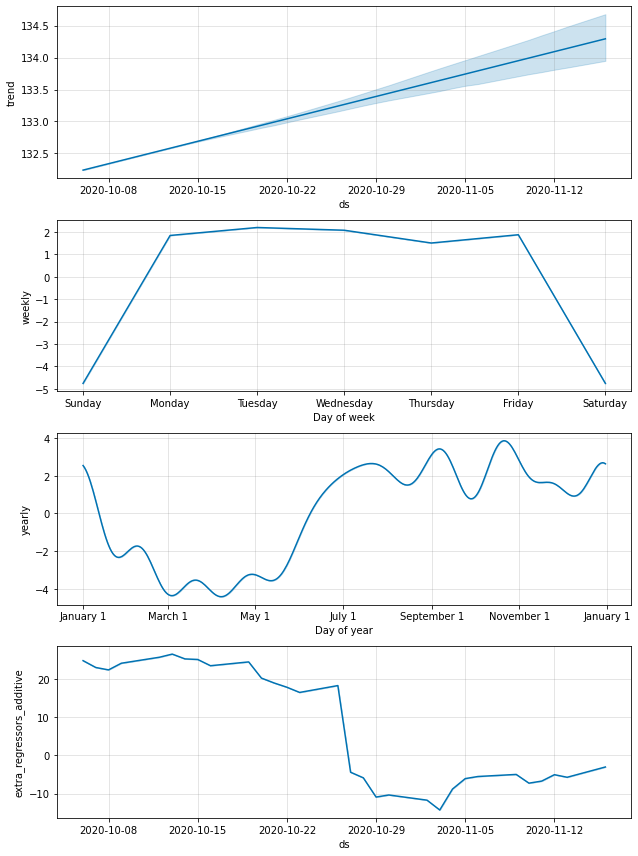

In [90]:
fig = model.plot_components(forecast)

### Evaluate model performance

In [91]:
# General metrics
from sklearn.metrics import mean_absolute_error

# Mean absolute error metric
def mae(y, yhat):
    return mean_absolute_error(y, yhat)

In [65]:
validation.Date.min(), validation.Date.max()

(Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-16 00:00:00'))

In [66]:
forecast.ds.min(), forecast.ds.max()

(Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-16 00:00:00'))

In [67]:
"Mean absolute error (Closing price of the stock) = ", mae(validation.Close, forecast.yhat)

('Mean absolute error (Closing price of the stock) = ', 50.046193158787524)